Khai báo thư viện

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Tải và nạp dữ liệu

In [13]:
data = pd.read_csv("laptop_price.csv", encoding="latin1")
print("Dữ liệu ban đầu:")
print(data.head())

Dữ liệu ban đầu:
   laptop_ID Company      Product   TypeName  Inches  \
0          1   Apple  MacBook Pro  Ultrabook    13.3   
1          2   Apple  Macbook Air  Ultrabook    13.3   
2          3      HP       250 G6   Notebook    15.6   
3          4   Apple  MacBook Pro  Ultrabook    15.4   
4          5   Apple  MacBook Pro  Ultrabook    13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000 

Thống kê mô tả dữ liệu

In [14]:
print("\nThông tin dữ liệu:")
print(data.info())
print("\nThống kê mô tả:")
print(data.describe())
print("\nSố lượng giá trị thiếu:")
print(data.isnull().sum())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB
None

Thống kê mô tả:
         laptop_ID       Inches  Price_euros
count  1303.000000  1303.000000  130

Mã hóa dữ liệu

In [15]:
encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,58,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,51,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,53,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,9,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,59,8,38,1803.60


Phân tích tương quan 

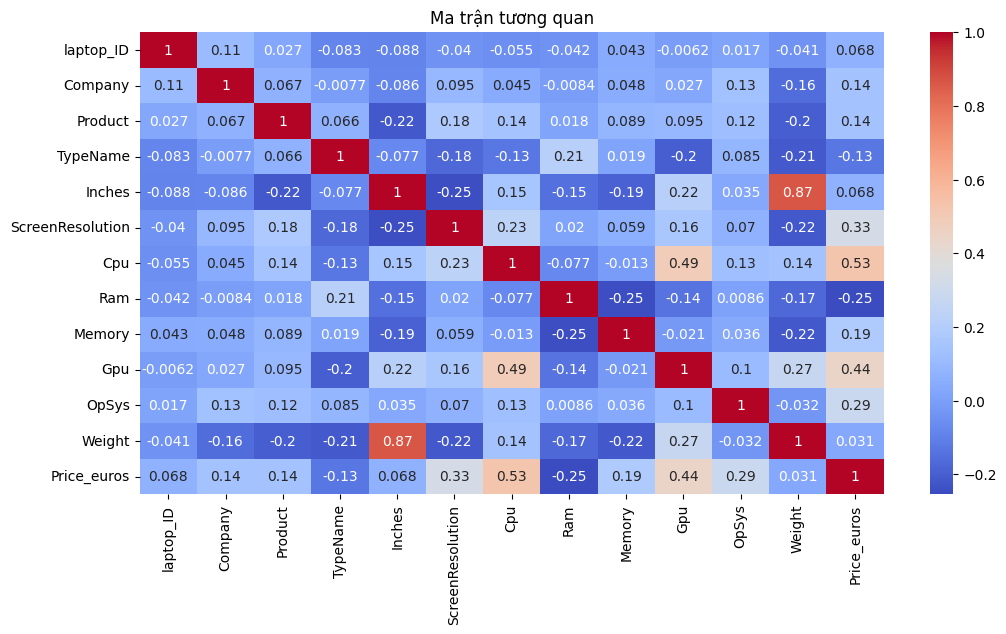

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan")
plt.show()

Lựa chọn các đặc trưng quan trọng 

In [18]:
corr_threshold = 0.25  
corr_matrix = data.corr()
target_corr = corr_matrix["Price_euros"]
selected_features = target_corr[abs(target_corr) > corr_threshold].index.tolist()
selected_features.remove("Price_euros")
print("\nCác đặc trưng được chọn:", selected_features)


Các đặc trưng được chọn: ['ScreenResolution', 'Cpu', 'Ram', 'Gpu', 'OpSys']


Phân chia dữ liệu để huấn luyện mô hình 

In [19]:
X = data[selected_features]
y = data["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Huấn luyện và so sánh các mô hình 

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nĐánh giá mô hình {name}:")
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R2 Score:", r2_score(y_test, y_pred))


Đánh giá mô hình Linear Regression:
MAE: 388.5997553572568
RMSE: 562.6898100396719
R2 Score: 0.37664247310658727

Đánh giá mô hình Decision Tree:
MAE: 220.81151612010183
RMSE: 344.9347409080774
R2 Score: 0.7657535692985474

Đánh giá mô hình Support Vector Regressor (SVR):
MAE: 460.159256936096
RMSE: 690.8844985622143
R2 Score: 0.06025504265152737

Đánh giá mô hình Random Forest:
MAE: 207.80052144910067
RMSE: 326.897566269864
R2 Score: 0.789611265365346

Đánh giá mô hình Gradient Boosting:
MAE: 209.7423268507812
RMSE: 303.0387809716999
R2 Score: 0.8192012066806437
